In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2, parser='auto')

In [3]:
type(car_data)

sklearn.utils._bunch.Bunch

In [4]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [5]:
car_data.details['version']

'2'

In [6]:
# Data description

print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [7]:
# Displaying feature names

car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [8]:
# Getting the whole dataframe

car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [9]:
type(car_data)

pandas.core.frame.DataFrame

In [11]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.3,
                                         random_state=20)

print('The size of training data is: {}\n The size of testing data is: {}'.format(len(train_data),
                                        len(test_data)))

The size of training data is: 1209
 The size of testing data is: 519


In [12]:
# Checking summary statistics

train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


In [13]:
# Checking missing values
train_data.isnull().sum()

buying         0
maint          0
doors          0
persons        0
lug_boot       0
safety         0
binaryClass    0
dtype: int64

In [14]:
train_data['buying'].value_counts()

med      327
high     307
vhigh    291
low      284
Name: buying, dtype: int64

In [15]:
train_data['maint'].value_counts()

high     311
med      311
vhigh    294
low      293
Name: maint, dtype: int64

In [16]:
train_data['doors'].value_counts()

5more    319
2        312
4        296
3        282
Name: doors, dtype: int64

In [17]:
train_data['persons'].value_counts()

more    418
2       407
4       384
Name: persons, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

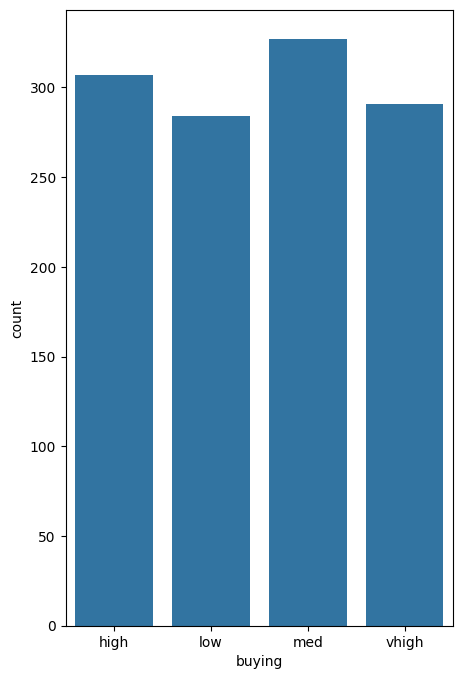

In [19]:
plt.figure(figsize=(5,8))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

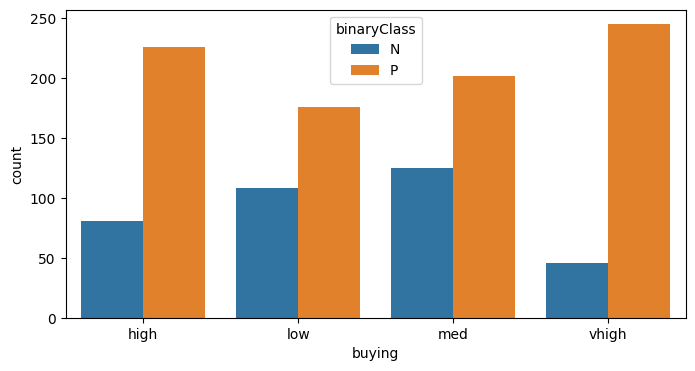

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

In [21]:
train_data['maint'].value_counts()

high     311
med      311
vhigh    294
low      293
Name: maint, dtype: int64

<Axes: xlabel='maint', ylabel='count'>

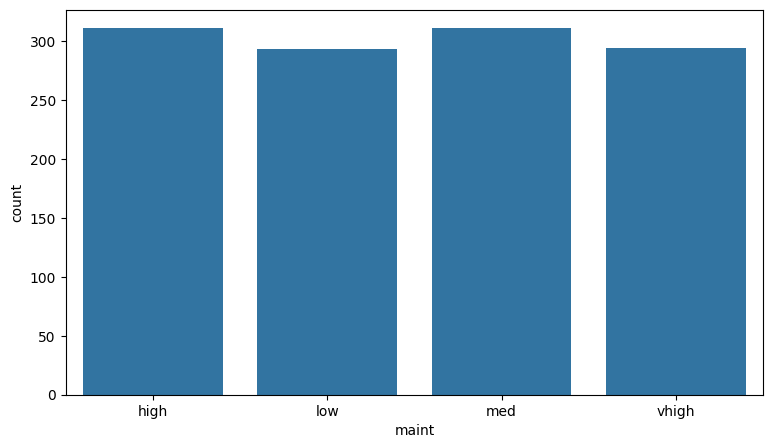

In [23]:
plt.figure(figsize=(9,5))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

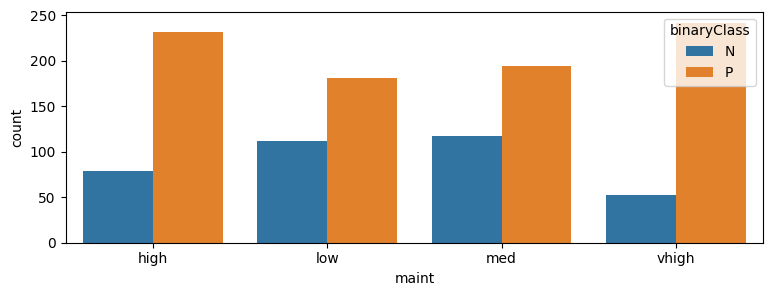

In [24]:
plt.figure(figsize=(9,3))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

In [25]:
train_data['doors'].value_counts()

5more    319
2        312
4        296
3        282
Name: doors, dtype: int64

<Axes: xlabel='doors', ylabel='count'>

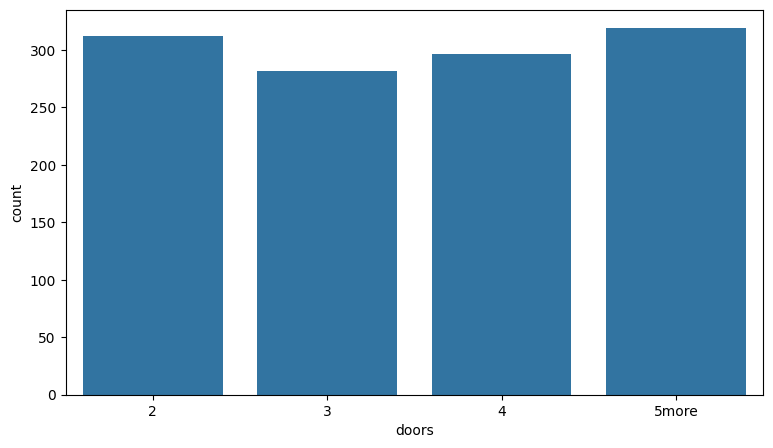

In [26]:
plt.figure(figsize=(9,5))
sns.countplot(data=train_data, x='doors')

<Axes: xlabel='doors', ylabel='count'>

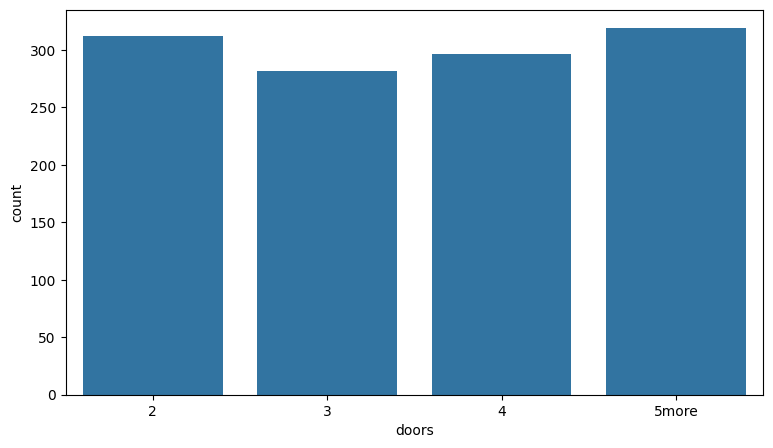

In [27]:
plt.figure(figsize=(9,5))
sns.countplot(data=train_data, x='doors')

In [28]:
train_data['persons'].value_counts()

more    418
2       407
4       384
Name: persons, dtype: int64

<Axes: xlabel='persons', ylabel='count'>

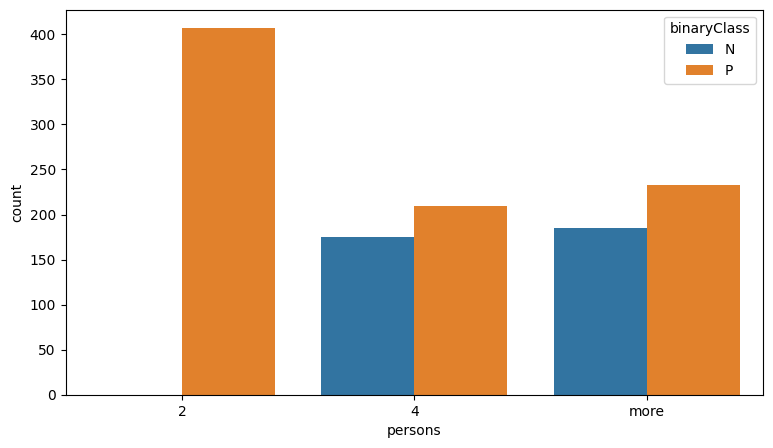

In [29]:
plt.figure(figsize=(9,5))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [30]:
train_data['lug_boot'].value_counts()

big      411
med      405
small    393
Name: lug_boot, dtype: int64

<Axes: xlabel='lug_boot', ylabel='count'>

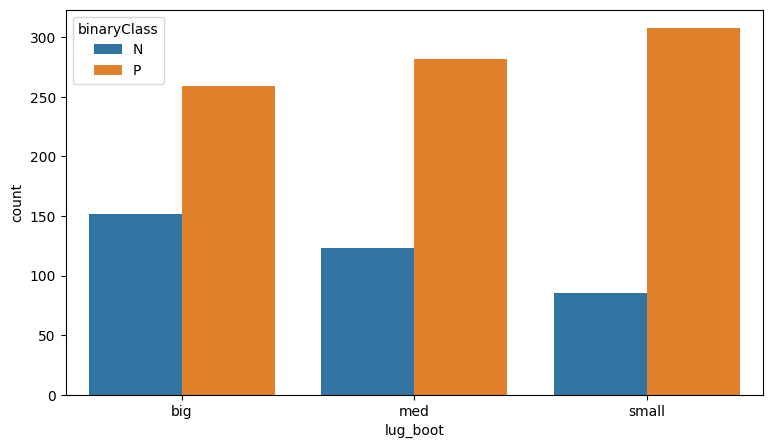

In [31]:
plt.figure(figsize=(9,5))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [32]:
train_data['safety'].value_counts()

med     406
low     402
high    401
Name: safety, dtype: int64

<Axes: xlabel='safety', ylabel='count'>

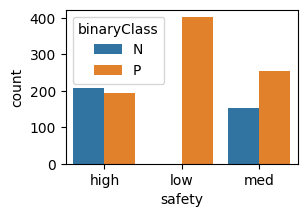

In [34]:
plt.figure(figsize=(3,2))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [35]:
train_data['binaryClass'].value_counts()

P    849
N    360
Name: binaryClass, dtype: int64

<Axes: xlabel='binaryClass', ylabel='count'>

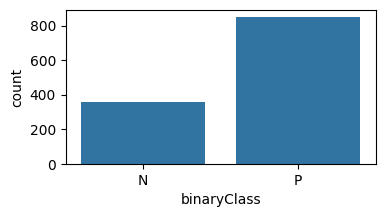

In [37]:
plt.figure(figsize=(4,2))
sns.countplot(data=train_data, x='binaryClass')

In [38]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

In [39]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([('ord_enc', OrdinalEncoder())])

car_train_prepared = pipe.fit_transform(car_train)

In [40]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

In [46]:
from sklearn import tree
text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- class: 1
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  2.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   | 

In [51]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
    """
    Take the input data, model and labels and return accuracy
    """
    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)
    return acc

In [52]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    """
    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)

    return cm

In [55]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    """
    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)

    return report

In [53]:
accuracy(car_train_prepared, tree_clf, car_labels_prepared)

1.0

In [54]:
conf_matrix(car_train_prepared, tree_clf, car_labels_prepared)

array([[360,   0],
       [  0, 849]])

In [56]:
class_report(car_train_prepared, tree_clf, car_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209



In [57]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [58]:
# Let's hide warnings returned by grid search

import warnings
warnings.filterwarnings('ignore')

In [59]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [60]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [61]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       max_leaf_nodes=5, random_state=42)

In [62]:
tree_best = grid_search.best_estimator_

In [63]:
car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

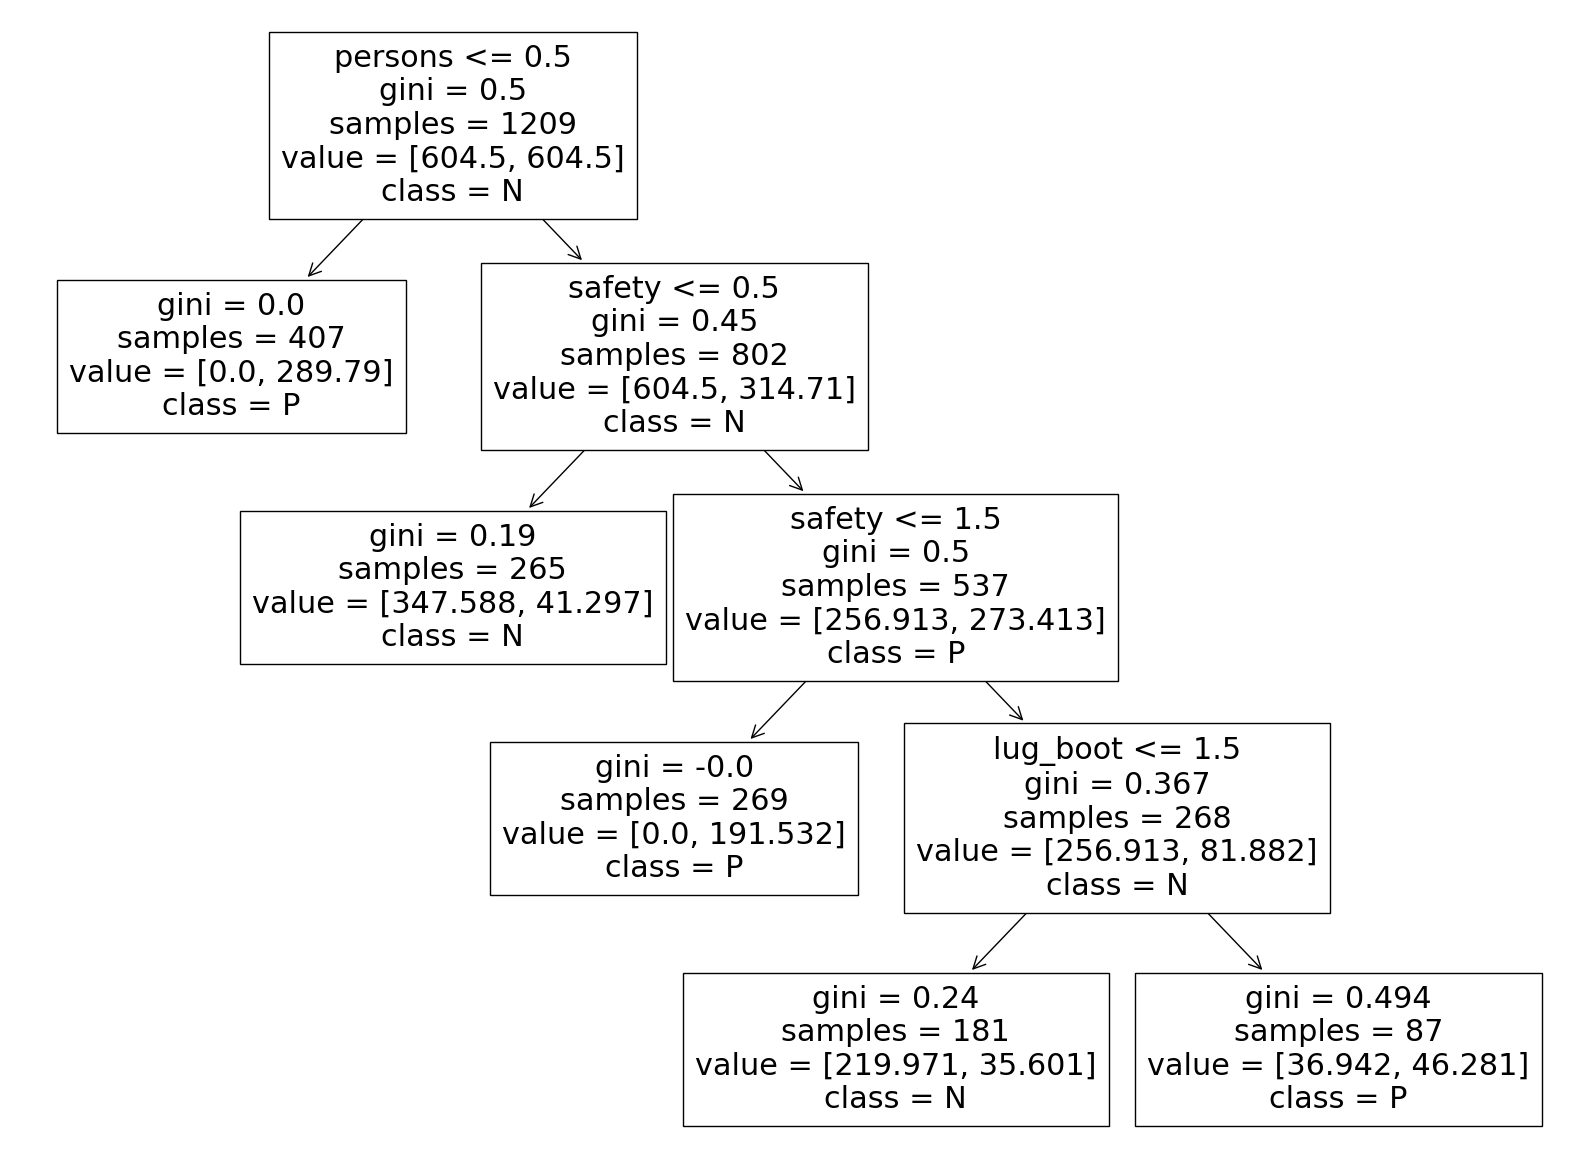

In [64]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);

In [65]:
accuracy(car_train_prepared, tree_best, car_labels_prepared)

0.8924731182795699

In [66]:
conf_matrix(car_train_prepared, tree_best, car_labels_prepared)

array([[338,  22],
       [108, 741]])

In [67]:
class_report(car_train_prepared, tree_best, car_labels_prepared)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       360
           1       0.97      0.87      0.92       849

    accuracy                           0.89      1209
   macro avg       0.86      0.91      0.88      1209
weighted avg       0.91      0.89      0.90      1209



In [69]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']

In [70]:
# Handling the categorical features with the pipeline that we defined early
# We don't fit on the test data. Only transform

car_test_prepared = pipe.transform(car_test)

In [71]:
# Handle labels too

car_test_labels_prepared = label_enc.transform(car_test_labels)

In [72]:
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)

0.8805394990366089

In [73]:
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)

array([[145,  13],
       [ 49, 312]])

In [74]:
class_report(car_test_prepared, tree_best, car_test_labels_prepared)

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       158
           1       0.96      0.86      0.91       361

    accuracy                           0.88       519
   macro avg       0.85      0.89      0.87       519
weighted avg       0.90      0.88      0.88       519

